In [1]:
%autoreload 2

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


semantic_path = Path("/data/vision/polina/scratch/clintonw/datasets/kubric/klevr/0/segmentation_0000.png")

UsageError: Line magic function `%autoreload` not found.


In [23]:
# a dict of integer to color
class_to_color = {
    0: (0, 0, 0),
    1: (255, 0, 0),
    2: (0, 255, 0),
    3: (0, 0, 255),
    4: (255, 255, 0),
    5: (255, 0, 255),
    6: (0, 255, 255),
    7: (255, 255, 255),
    8: (128, 0, 0),
    9: (0, 128, 0),
    10: (0, 0, 128),
}
# map as array
int_to_color = np.array([class_to_color[i] for i in range(len(class_to_color))])

# inverse mapping
color_to_class = {v: k for k, v in class_to_color.items()}

def show_semantic_map(semantic_map):
    if len(semantic_map.shape) == 3:
        semantic_map = semantic_map.squeeze(-1)
    rgb_array = int_to_color[semantic_map]
    
    plt.imshow(rgb_array)
    plt.show()

In [21]:
from PIL import Image
image = Image.open(semantic_path)
image.show()
semantic_map = np.array(image)

xv: Can't open display


In [7]:
semantic_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[0 1 2 3 4 5]


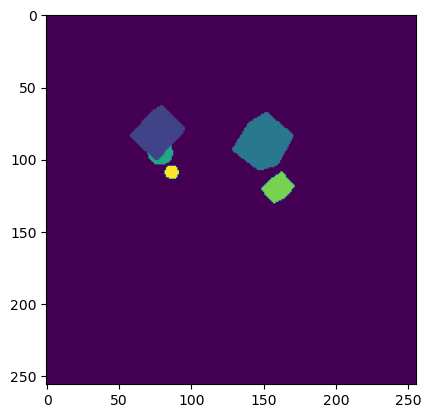

In [10]:
plt.imshow(semantic_map)
print(np.unique(semantic_map))

In [28]:
from nerfstudio.data.utils.data_utils import get_semantics_and_mask_tensors_from_path
import torch

input_mask = torch.zeros(256,256) + 3
sem, mask = get_semantics_and_mask_tensors_from_path(semantic_path, mask_indices=[])

show_semantic_map(sem)


TypeError: tensor(): argument 'dtype' must be torch.dtype, not str

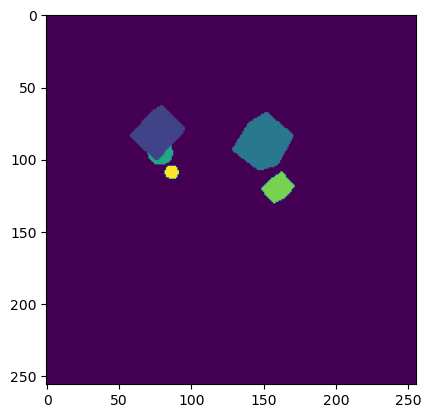

In [17]:
plt.imshow(sem)

In [4]:
from PIL import Image
import numpy as np


pil_image = Image.open("/data/vision/polina/projects/wmh/dhollidt/kubric_datasets/klevr/0/normal_00000.png")
image = np.array(pil_image, dtype="uint8")  # shape is (h, w) or (h, w, 3 or 4)
if len(image.shape) == 2:
    image = image[:, :, None].repeat(3, axis=2)
assert len(image.shape) == 3
assert image.dtype == np.uint8
assert image.shape[2] in [3, 4], f"Image shape of {image.shape} is in correct."
image = image/256

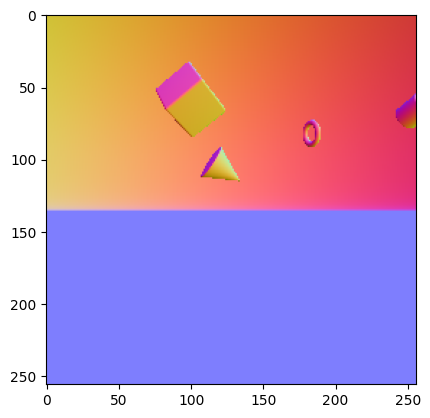

In [5]:
# show image with matplot lib
import matplotlib.pyplot as plt

plt.imshow(image)


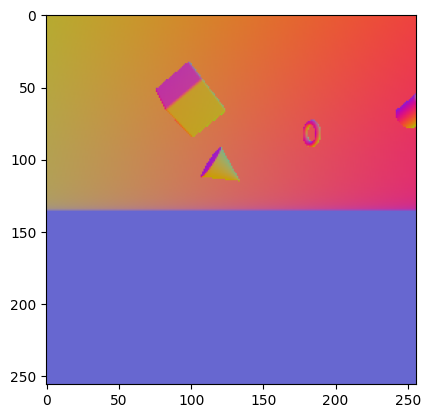

In [13]:
# normalize image
norm_image = image / np.linalg.norm(image, axis=-1, keepdims=True)

plt.imshow(norm_image)


assert np.allclose(np.linalg.norm(norm_image, axis=-1, keepdims=True), np.ones_like(np.linalg.norm(image, axis=-1, keepdims=True)))

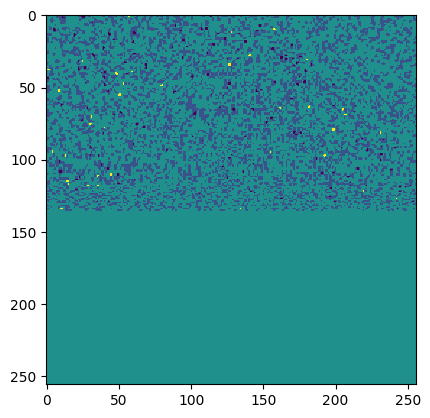

In [10]:
plt.imshow(np.linalg.norm(norm_image, axis=-1))

In [15]:
np.linalg.norm(norm_image, axis=-1).min()

0.9999999999999998

In [2]:
from nerfstudio.data.utils.data_utils import get_depth_image_from_path
from pathlib import Path
depth_image = get_depth_image_from_path(
            filepath=Path("/data/vision/polina/projects/wmh/dhollidt/datasets/klevr_nesf/0/depth_00002.tiff"), height=256, width=256, scale_factor=1
        )


In [3]:
depth_image

tensor([[[30.],
         [30.],
         [30.],
         ...,
         [30.],
         [30.],
         [30.]],

        [[30.],
         [30.],
         [30.],
         ...,
         [30.],
         [30.],
         [30.]],

        [[30.],
         [30.],
         [30.],
         ...,
         [30.],
         [30.],
         [30.]],

        ...,

        [[30.],
         [30.],
         [30.],
         ...,
         [30.],
         [30.],
         [30.]],

        [[30.],
         [30.],
         [30.],
         ...,
         [30.],
         [30.],
         [30.]],

        [[30.],
         [30.],
         [30.],
         ...,
         [30.],
         [30.],
         [30.]]], dtype=torch.float64)

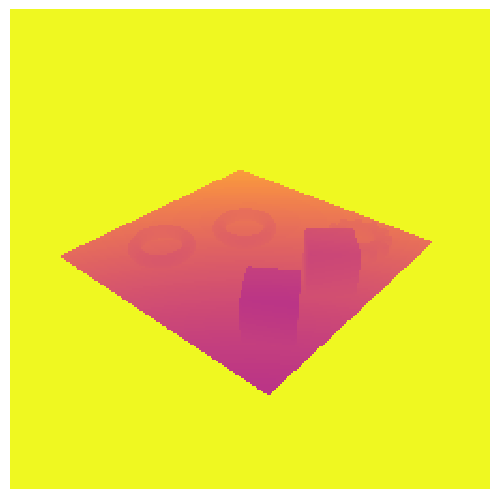

In [21]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()
image = depth_image.numpy()
heatmap = ax.imshow(image, cmap='plasma', interpolation='nearest')
ax.axis('off')
heatmap.set_clim(vmin=0, vmax=20)
plt.tight_layout(pad=0)
plt.show()